# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_excel(r"C:\Users\user\Downloads\02 Churn-Dataset.xlsx")
# let's view the first 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


# Data Overview

In [14]:
# To view the number of rows and columns
df.shape

(7043, 23)

In [15]:
# To view the columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [16]:
# To check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


. There are no null values in the dataset


. TotalCharges dataype is object which is suppose to be a numerical and SeniorCitizen dispaly integer instead of object 

# Exploratory Data Analysis

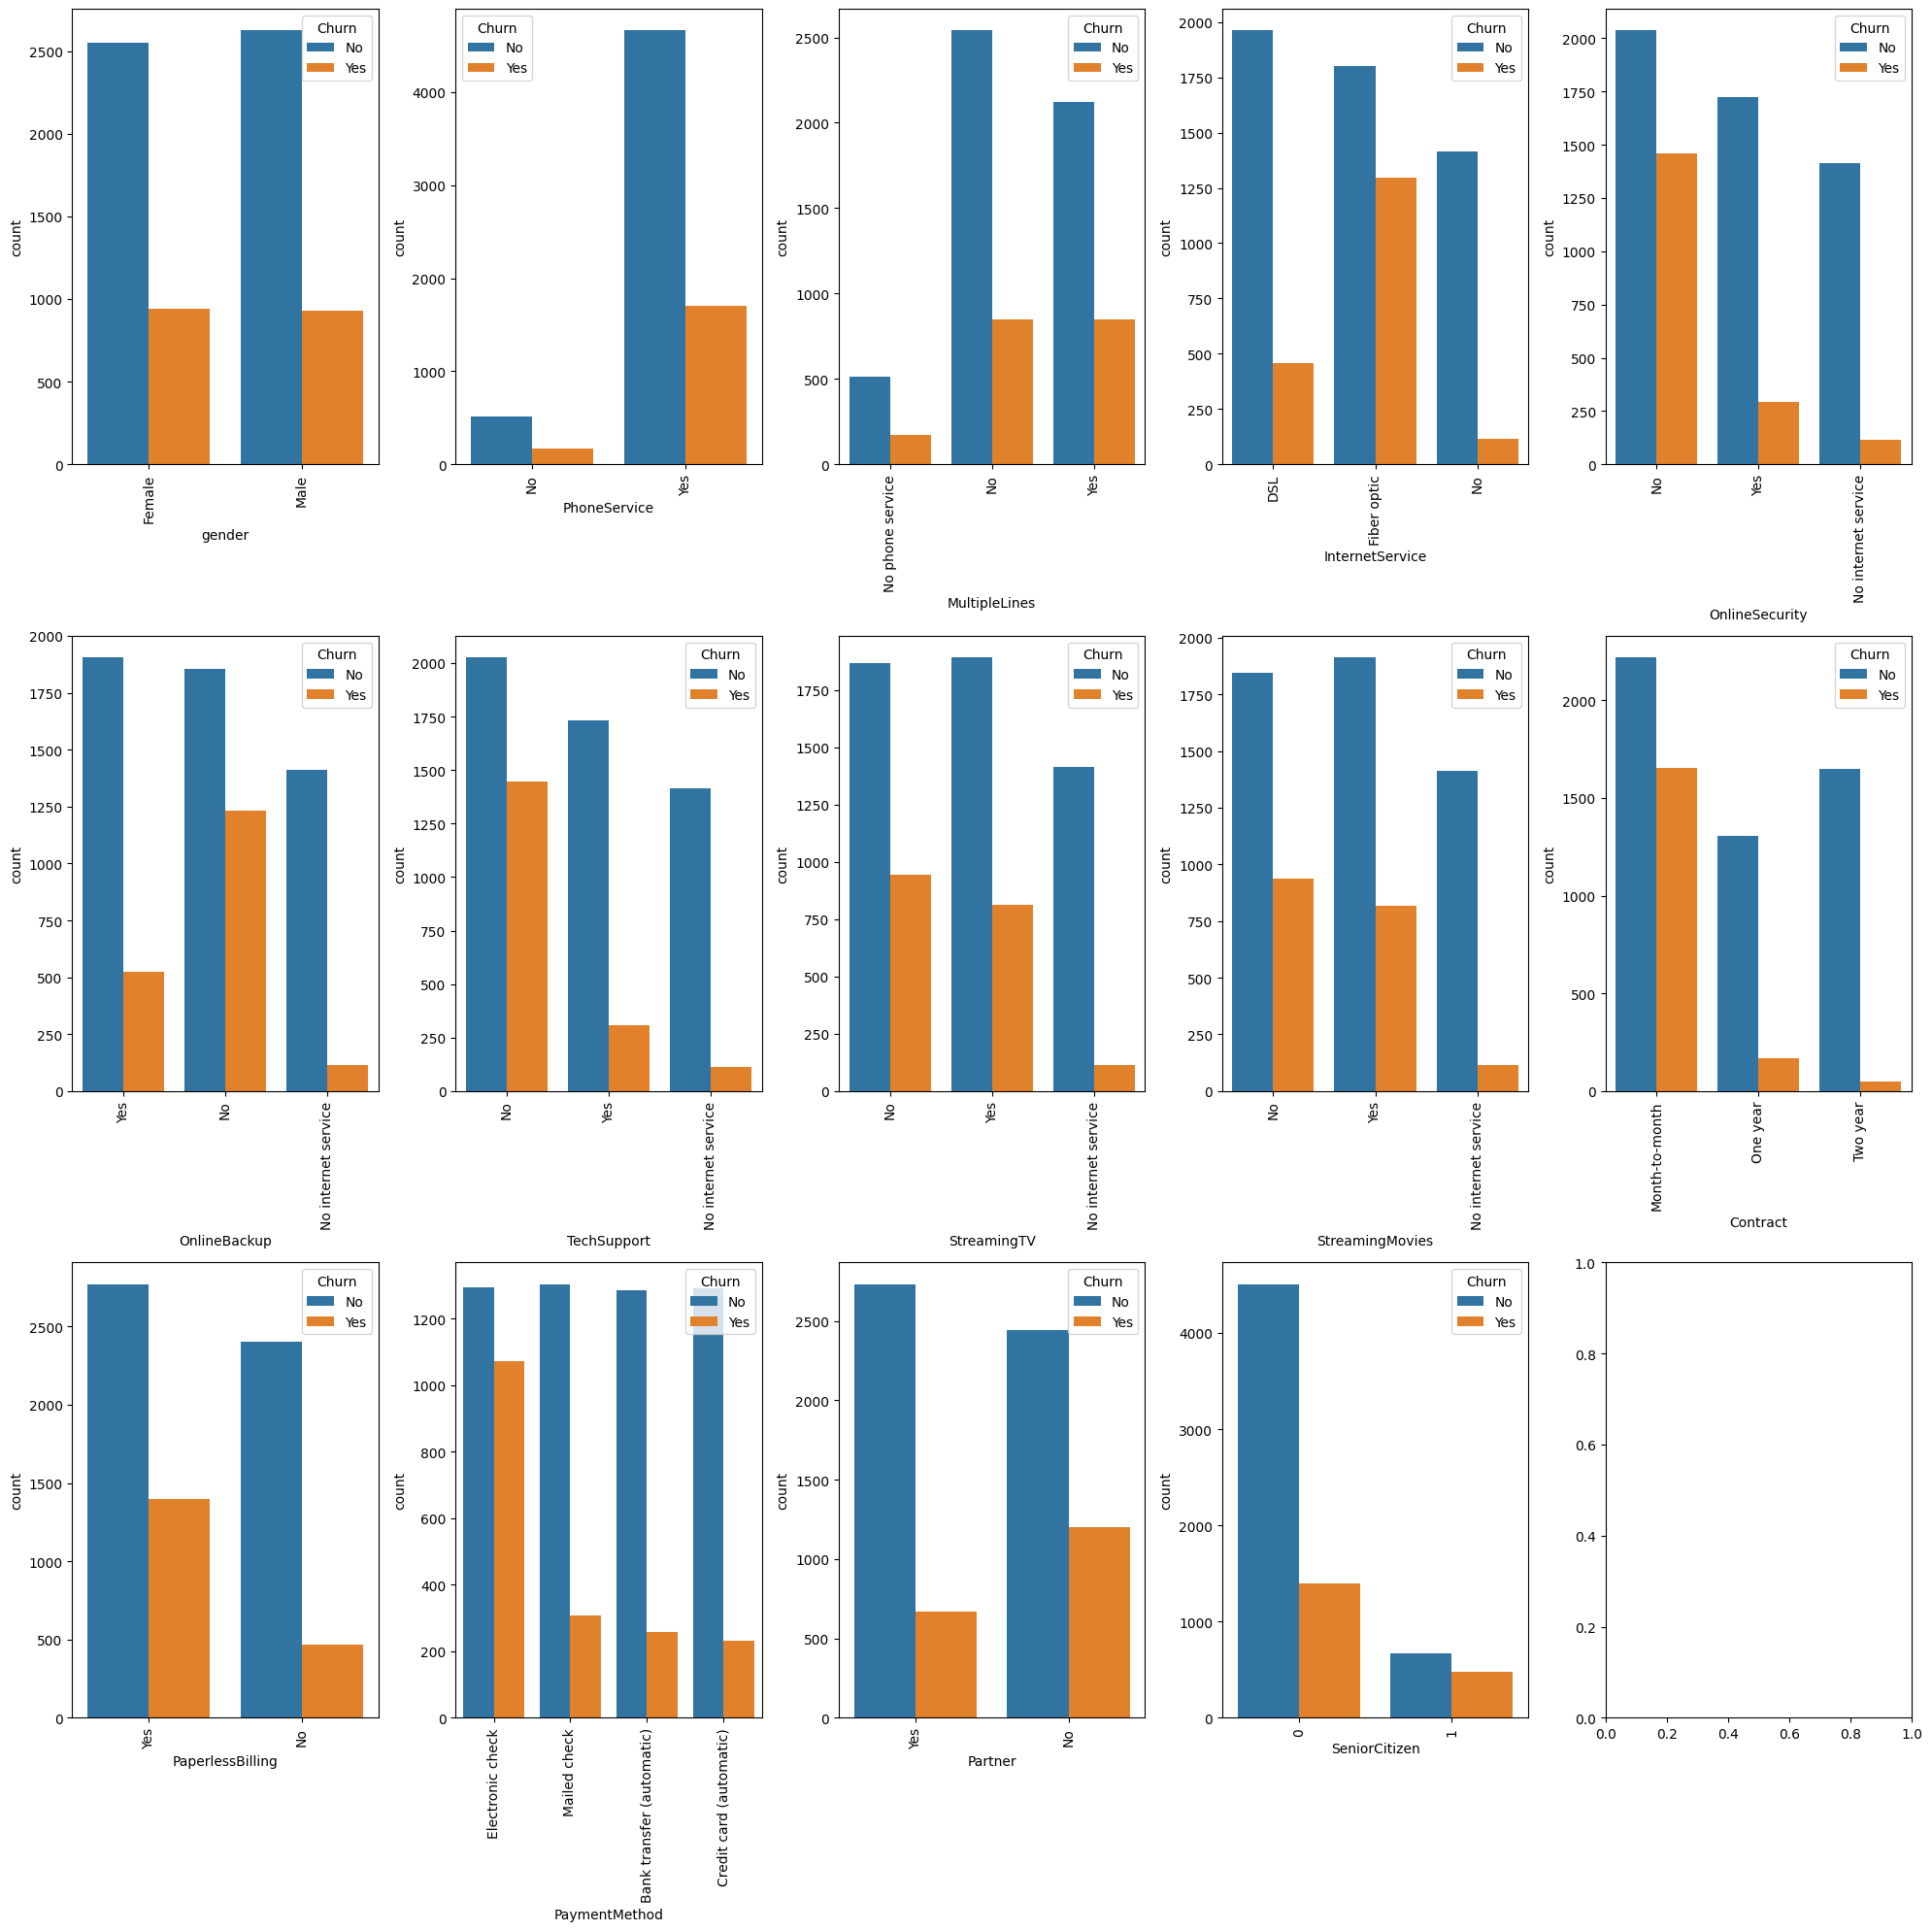

In [9]:
cat_var = ["gender",
                   "PhoneService", "MultipleLines", "InternetService",
                   "OnlineSecurity", "OnlineBackup",
                   "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                   "PaperlessBilling", "PaymentMethod","Partner", "SeniorCitizen"]


fig, axis= plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axis = axis.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='Churn', data=df, ax=axis[i])
    ax=axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

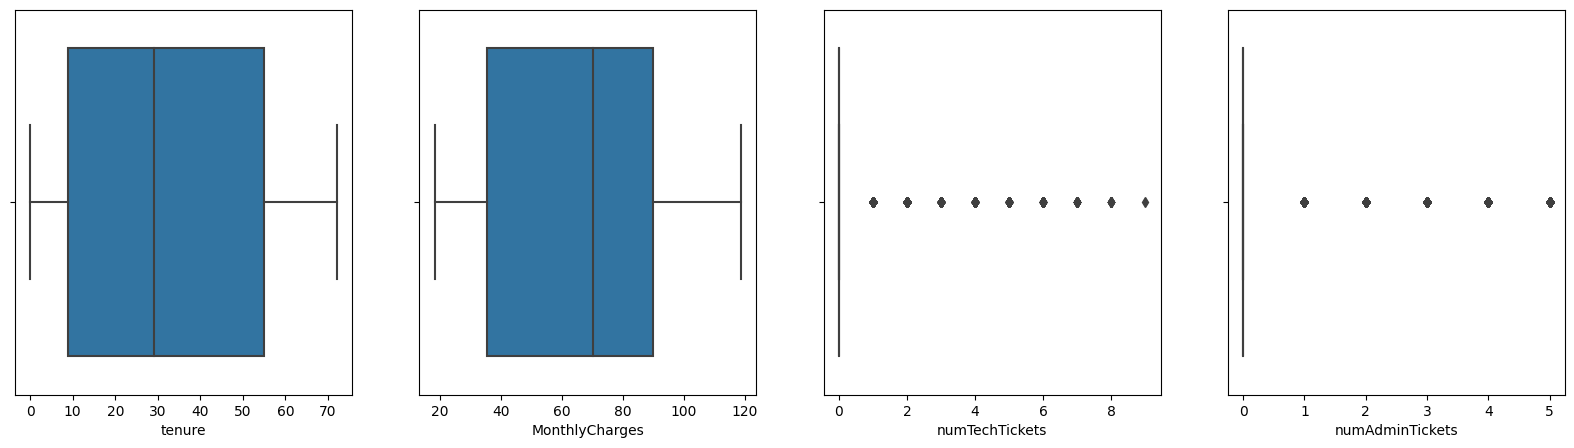

In [22]:
num_var = ['tenure', 'MonthlyCharges', 'numTechTickets', 'numAdminTickets']

fig, axis= plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axis = axis.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(x=var, hue='Churn', data=df, ax=axis[i])

. There are outliers in the numTechTickets and numAdminTickets columns

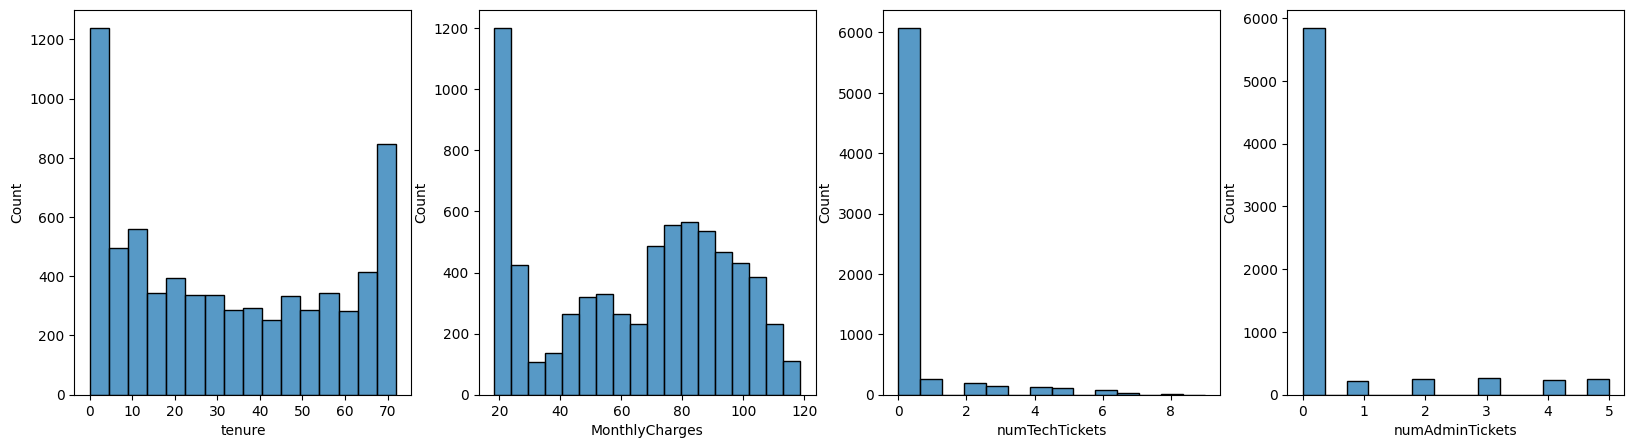

In [23]:
num_var =  ['tenure', 'MonthlyCharges', 'numTechTickets', 'numAdminTickets']

fig, axis= plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axis = axis.flatten()

for i, var in enumerate(num_var):
    sns.histplot(x=var, data=df, ax=axis[i])

# Data Preprocessing

In [25]:
# To convert string to numerical 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [26]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtypes

dtype('O')

In [27]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [37]:
# To fill missing value for numerical columns
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [36]:
# To fill missing value for categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode(), inplace=True)


In [40]:
# To replace NO phone service to No
# To replace internet service to No
df = df.replace('No phone service', 'No')
df = df.replace('No internet service', 'No')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889,0,0,No


In [41]:
# drop unwanted columns
df.drop(columns=['customerID', 'numAdminTickets', 'Partner', 'DeviceProtection'], axis=1, inplace=True)

In [42]:
# To convert our categoical fetures to numerical for our machine learning model
df = pd.get_dummies(df, drop_first=False)

In [43]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numTechTickets,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840,3,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [46]:
# to scale our numerical features 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges','numTechTickets']] = scale.fit_transform(df[['tenure','MonthlyCharges','TotalCharges','numTechTickets']])
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numTechTickets,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,-1.277445,-1.160323,-0.995141,-0.335645,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173889,-0.335645,0,1,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,-1.236724,-0.362660,-0.960259,-0.335645,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0.514251,-0.746535,-0.195524,2.064301,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,-1.236724,0.197365,-0.941274,-0.335645,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


<Axes: >

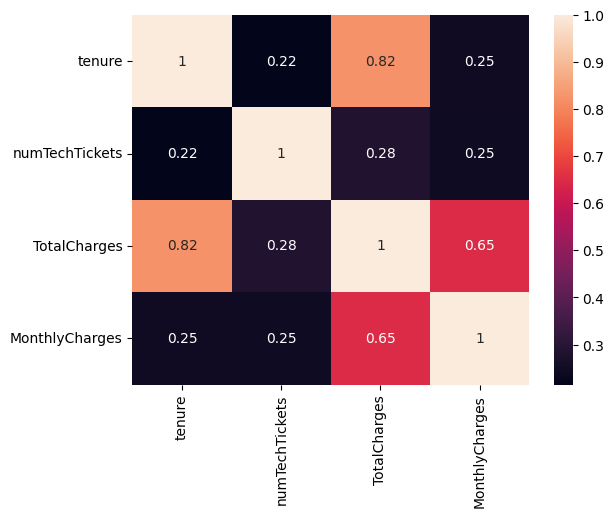

In [48]:
## checking correlation
corr_data=df[['tenure','numTechTickets','TotalCharges','MonthlyCharges']]
sns.heatmap(corr_data.corr(), annot=True)

In [49]:
## checking the duplicate rows
df.duplicated().sum()

23

In [51]:
df = df.drop_duplicates()

In [52]:
# to split our dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Churn_No','Churn_Yes'], axis=1), 
                                                    df['Churn_Yes'], test_size=0.2, random_state=50)

In [54]:
print(len(X_train))
print(len(X_test))

5616
1404


# importing libraries for my Decision tree Classifier machine learning technique

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
DT = DecisionTreeClassifier()

In [60]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,10],
    'min_samples_split': range(2,10,1),
    'min_samples_leaf': range(2,10,1)
}

In [62]:
grid_search = GridSearchCV(DT, grid_params, cv=5, n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [63]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2) 



In [65]:
best_classifier = grid_search.best_params_
print(best_classifier,'\n')

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2} 



In [66]:
DT = DecisionTreeClassifier(random_state= 50, criterion='entropy', max_depth=5, min_samples_leaf=2)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=50)

In [67]:
y_pred=DT.predict(X_test)

In [68]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[962  69]
 [139 234]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1031
           1       0.77      0.63      0.69       373

    accuracy                           0.85      1404
   macro avg       0.82      0.78      0.80      1404
weighted avg       0.85      0.85      0.85      1404



<Axes: >

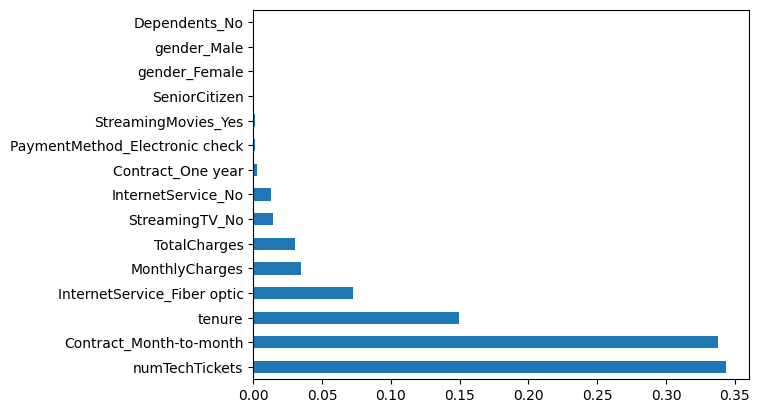

In [71]:
DT.feature_importances_
feature_importances_best_classifier =pd.Series(DT.feature_importances_, index=X_train.columns)
feature_importances_best_classifier.nlargest(15).plot(kind='barh')

. This visualization displays in the important features in this model

# Random forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
Rf = RandomForestClassifier()

In [81]:
param= {
    'n_estimators': [5, 10, 15, 20]
    ,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

In [82]:
grid_search2 = GridSearchCV(Rf, param, cv=5, n_jobs= -1, verbose= 1)

In [87]:
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [89]:
best_classifier2 = grid_search2.best_estimator_
print(best_classifier2, '\n')

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=20) 



In [91]:
Rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=20, random_state=50, n_jobs= -1, verbose= 1)

In [92]:
Rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=20, n_jobs=-1, random_state=50, verbose=1)

In [97]:
y_pred2 = Rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [98]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1031
           1       0.77      0.65      0.71       373

    accuracy                           0.86      1404
   macro avg       0.82      0.79      0.81      1404
weighted avg       0.85      0.86      0.85      1404

[[957  74]
 [129 244]]


<Axes: >

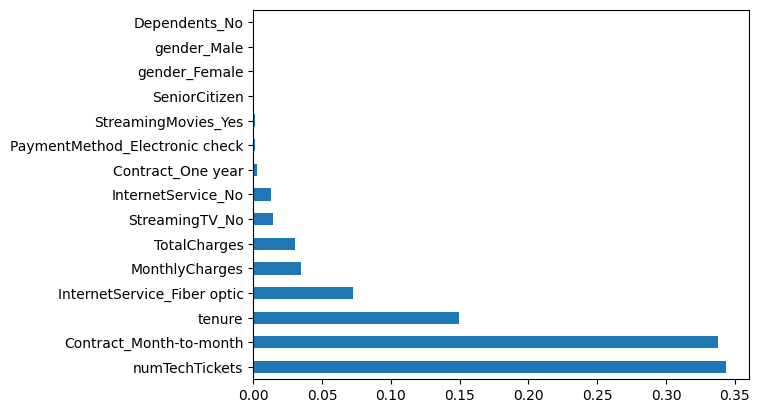

In [102]:
Rf.feature_importances_
feature_importances = pd.Series(Rf.feature_importances_, index=X_train.columns)
feature_importances_best_classifier.nlargest(15).plot(kind='barh')